<a href="https://colab.research.google.com/github/heysourin/Exploratory-Data-Analysis-EDA/blob/main/file1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [6]:
# Configuring the kaggle.json file, that I have uploaded to colab files.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset #https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 59.6MB/s]


In [10]:
!ls

healthcare-dataset-stroke-data.csv  kaggle.json  sample_data  stroke-prediction-dataset.zip


In [9]:
# Extracting the zip file
from zipfile import ZipFile
dataset = '/content/stroke-prediction-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Data, extracted!")

Data, extracted!


In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, KFold

In [204]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [205]:
df.shape

(5110, 12)

In [206]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [207]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [209]:
#Replacing missing values with imputation and converting the data type of the column into "float"
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['bmi'] = df['bmi'].astype(float)

In [210]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [212]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [213]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [214]:
print(df['gender'].value_counts())
print("-------------------------")
print(df['work_type'].value_counts())
print("-------------------------")
print(df['Residence_type'].value_counts())
print("-------------------------")
print(df['ever_married'].value_counts())
print("-------------------------")
print(df['smoking_status'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
-------------------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
-------------------------
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
-------------------------
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
-------------------------
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [215]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [229]:
# Replacing with numerical data: Ordinal encoding. (OHE preferable)
work_type_mapping = {
    'Private': 0,
    'Self-employed': 1,
    'children': 2,
    'Govt_job': 3,
    'Never_worked': 4
}

df['work_type'] = df['work_type'].replace(work_type_mapping)

ever_married_mapping = {
    'Yes': 1,
    'No': 0
}

df['ever_married'] = df['ever_married'].replace(ever_married_mapping)

smoking_status_mapping = {
    'never smoked': 0,
    'Unknown': 1,
    'formerly smoked':2,
    'smokes': 3
}

df['smoking_status'] = df['smoking_status'].replace(smoking_status_mapping)

In [217]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,0,Urban,228.69,36.600000,2,1
1,51676,Female,61.0,0,0,1,1,Rural,202.21,28.893237,0,1
2,31112,Male,80.0,0,1,1,0,Rural,105.92,32.500000,0,1
3,60182,Female,49.0,0,0,1,0,Urban,171.23,34.400000,3,1
4,1665,Female,79.0,1,0,1,1,Rural,174.12,24.000000,0,1


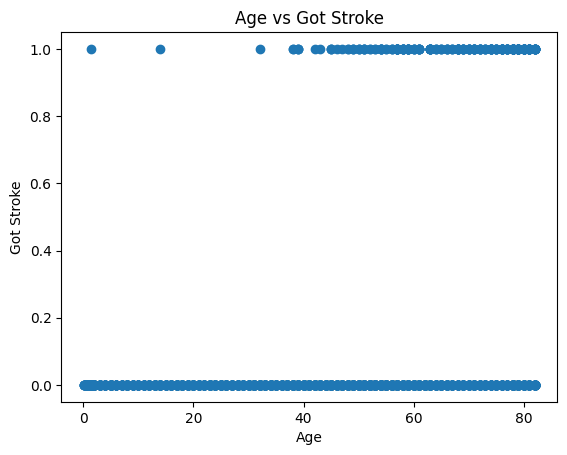

In [218]:
plt.scatter(df['age'], df['stroke'])
plt.xlabel('Age')
plt.ylabel('Got Stroke')
plt.title('Age vs Got Stroke')
plt.show()

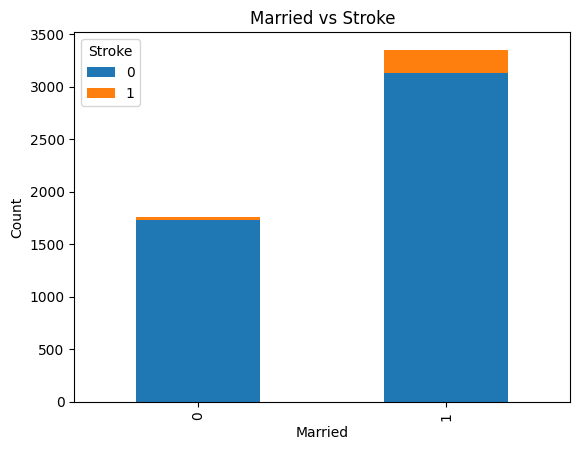

In [219]:
import matplotlib.pyplot as plt

# Group by 'married' and count the occurrences of stroke
married_stroke_counts = df.groupby('ever_married')['stroke'].value_counts().unstack()

# Plot
married_stroke_counts.plot(kind='bar', stacked=True)
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married vs Stroke')
plt.legend(title='Stroke')
plt.show()


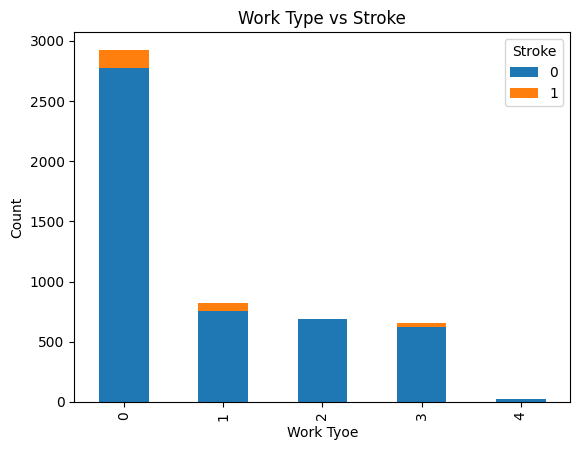

In [228]:
work_type_counts = df.groupby('work_type')['stroke'].value_counts().unstack()

# Plot
work_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Work Tyoe')
plt.ylabel('Count')
plt.title('Work Type vs Stroke')
plt.legend(title='Stroke')
plt.show()

# """
#     'Private': 0,
#     'Self-employed': 1,
#     'children': 2,
#     'Govt_job': 3,
#     'Never_worked': 4
# """

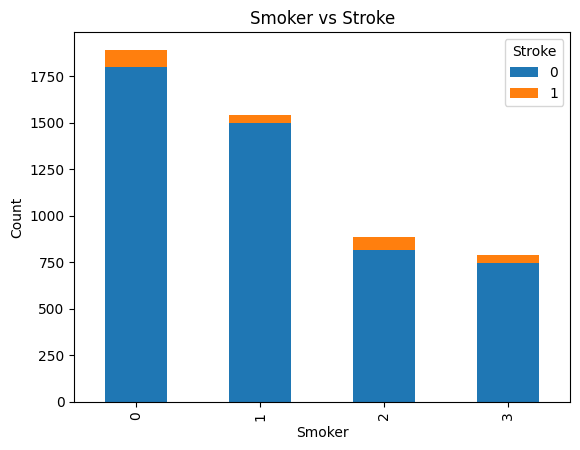

In [230]:
smoking_status_counts = df.groupby('smoking_status')['stroke'].value_counts().unstack()

# Plot
smoking_status_counts.plot(kind='bar', stacked=True)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker vs Stroke')
plt.legend(title='Stroke')
plt.show()

# 'never smoked': 0,
# 'Unknown': 1,
# 'formerly smoked':2,
# 'smokes': 3
